<a href="https://colab.research.google.com/github/VishnudevButla/FMML_Labs_and_Projects/blob/main/AIML_Module_2_project_2024_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

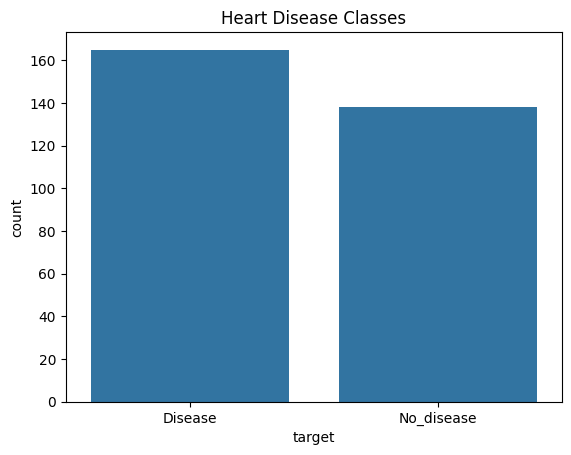

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

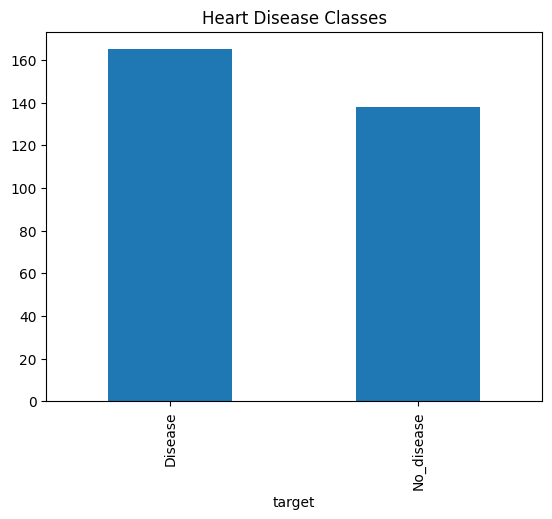

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Sex of the participants')

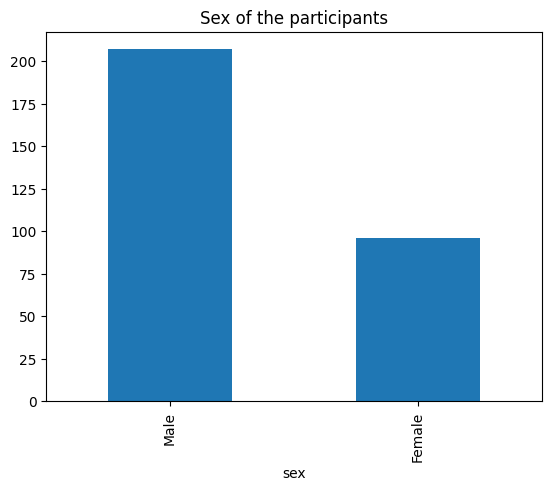

In [10]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
data['sex'].value_counts().plot(kind='bar').set_title('Sex of the participants')

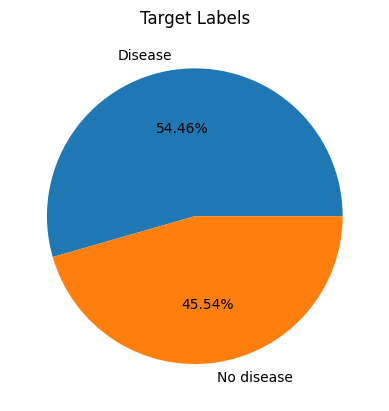

In [11]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.2f%%')
plt.title('Target Labels')
plt.show()

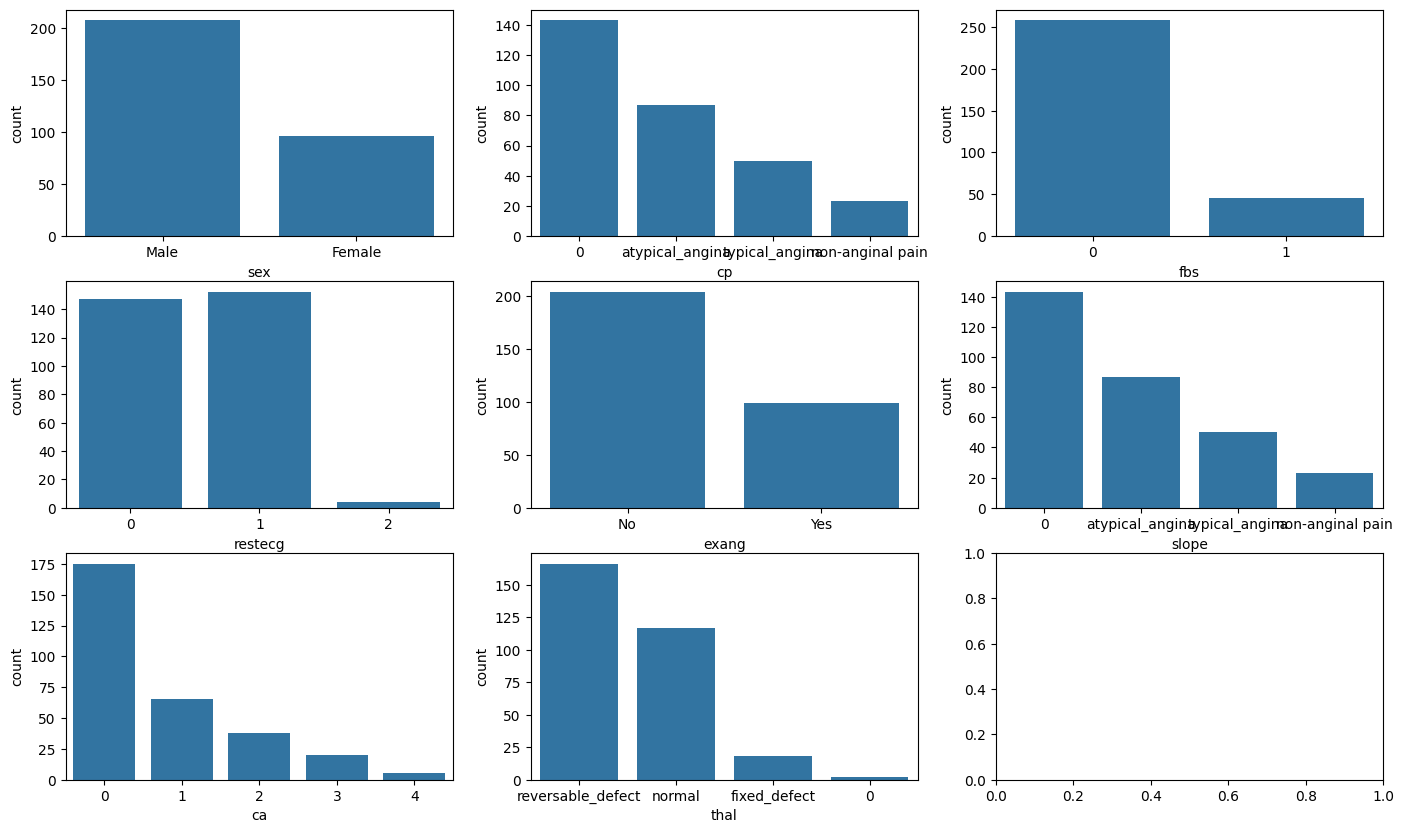

In [12]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

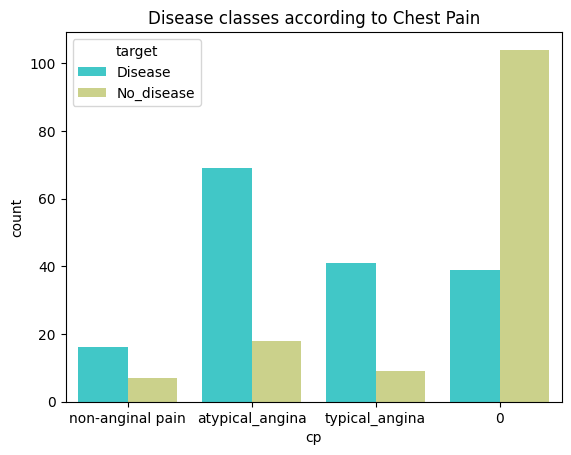

In [13]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

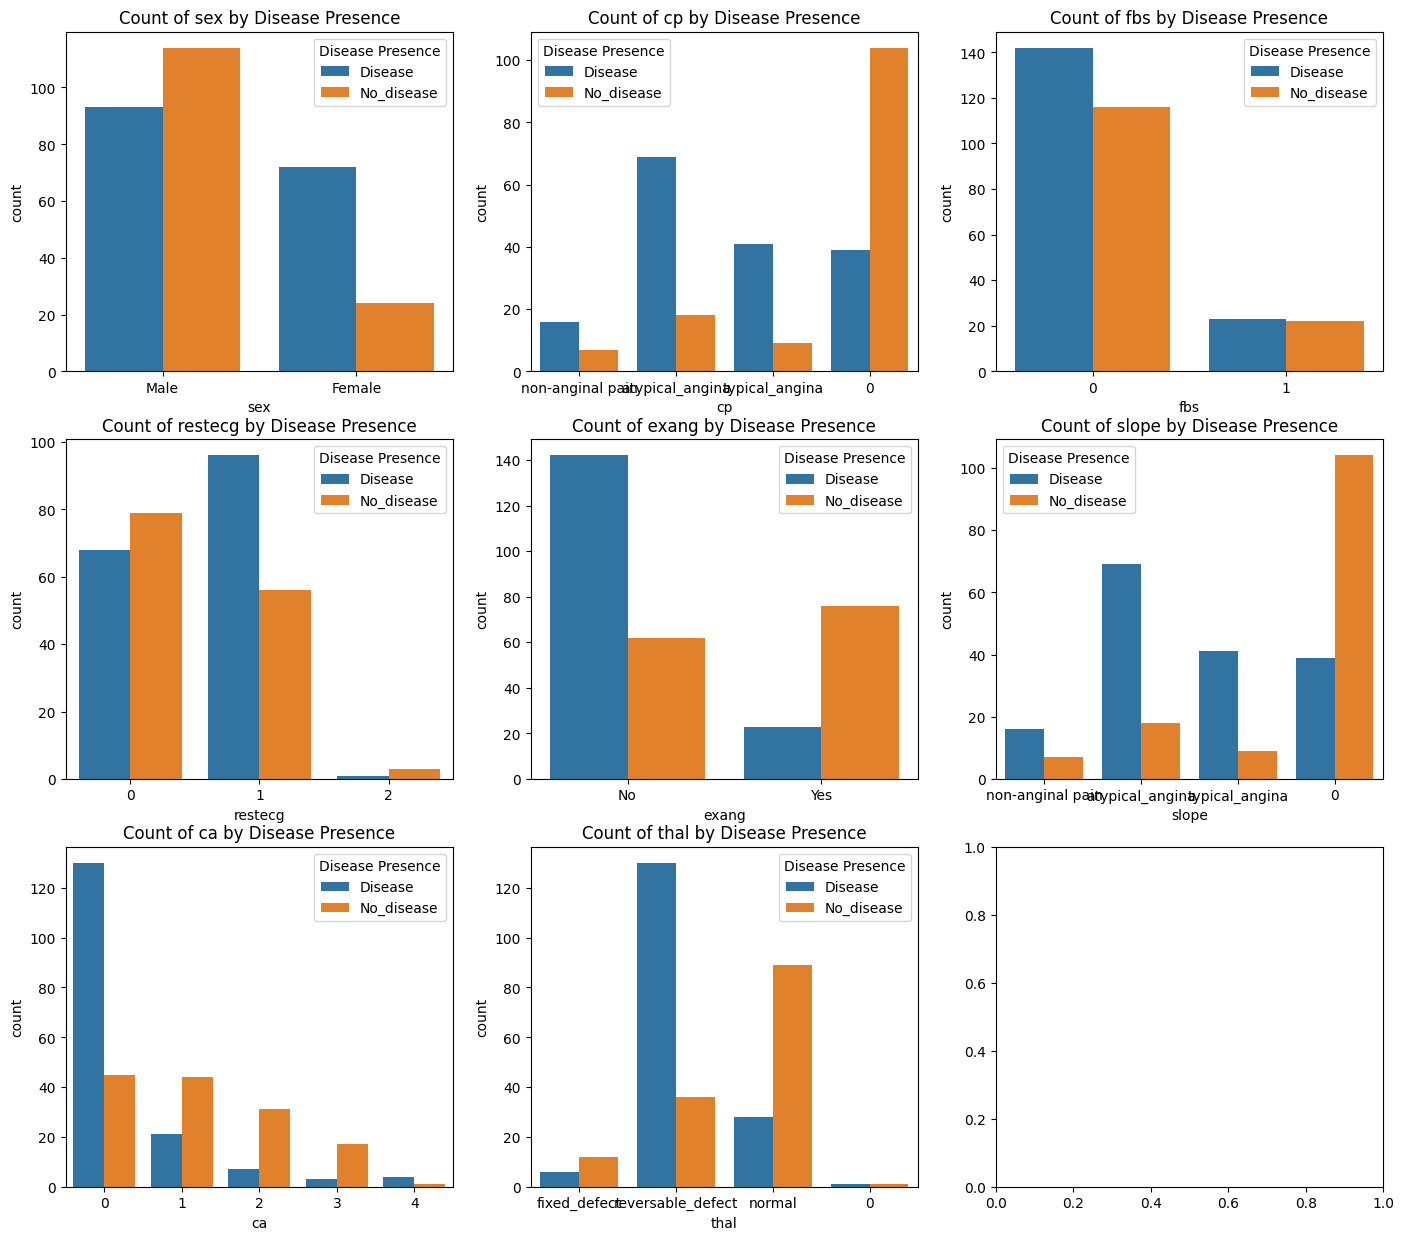

In [14]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,15))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=data,ax=ax).set_title(f'Count of {feature} by Disease Presence')
    ax.legend(title='Disease Presence')


In [15]:
# Visualising the distribution of the continous variables

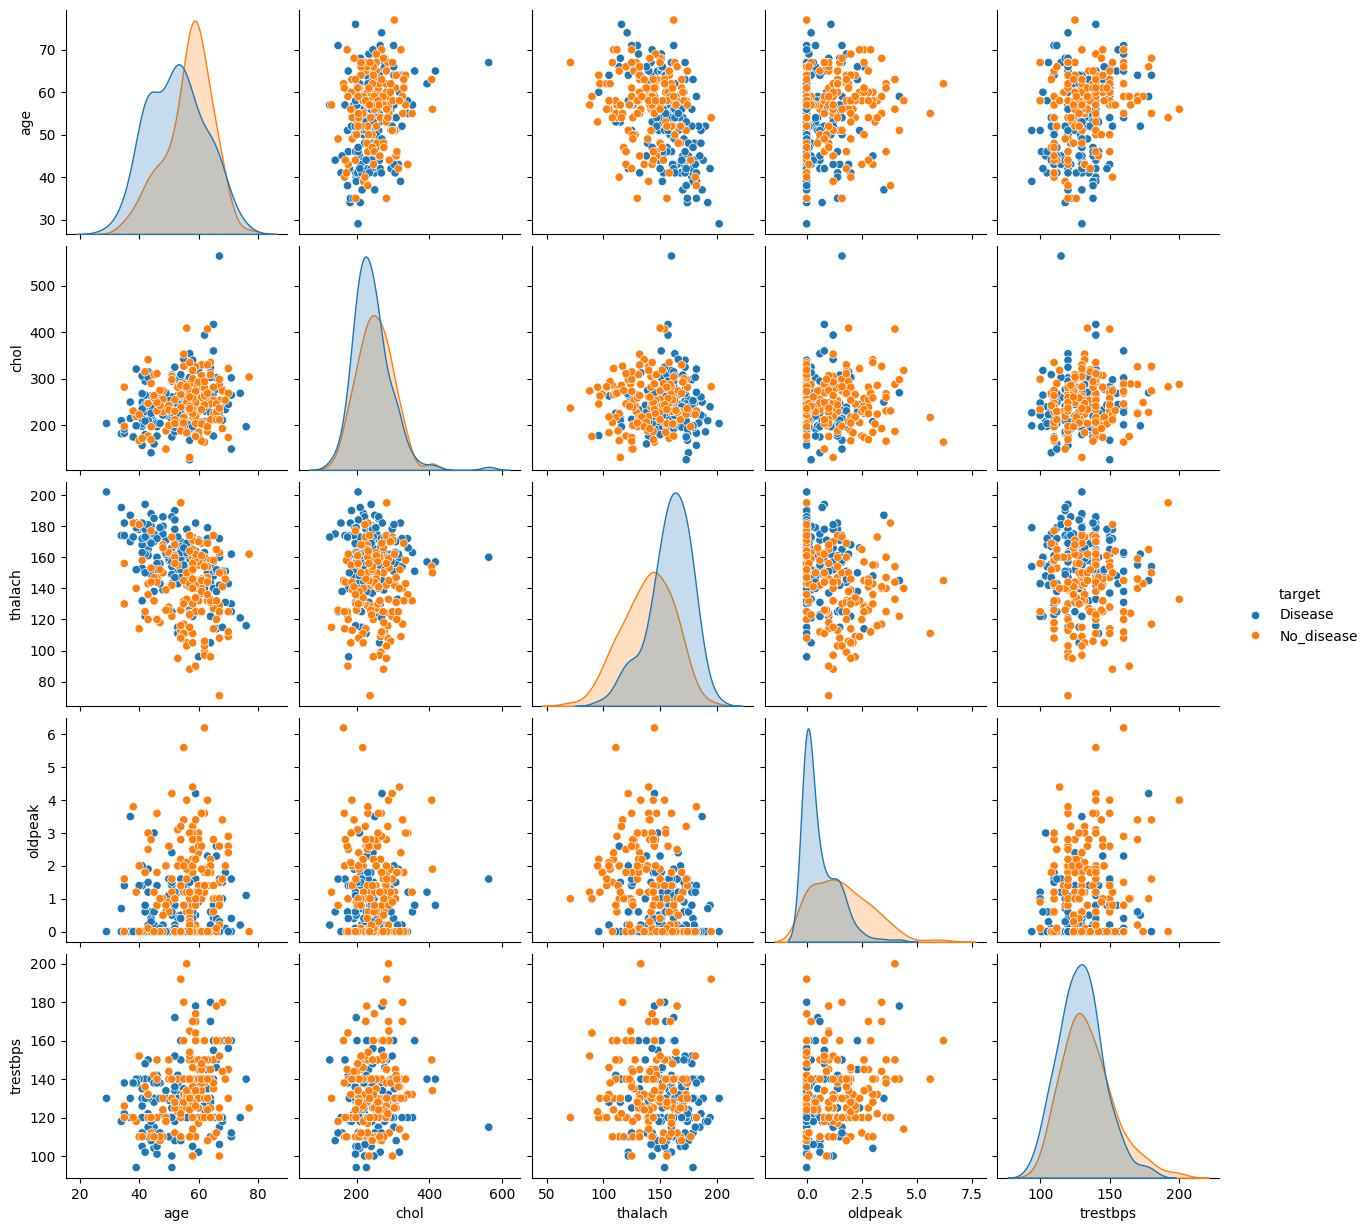

In [16]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

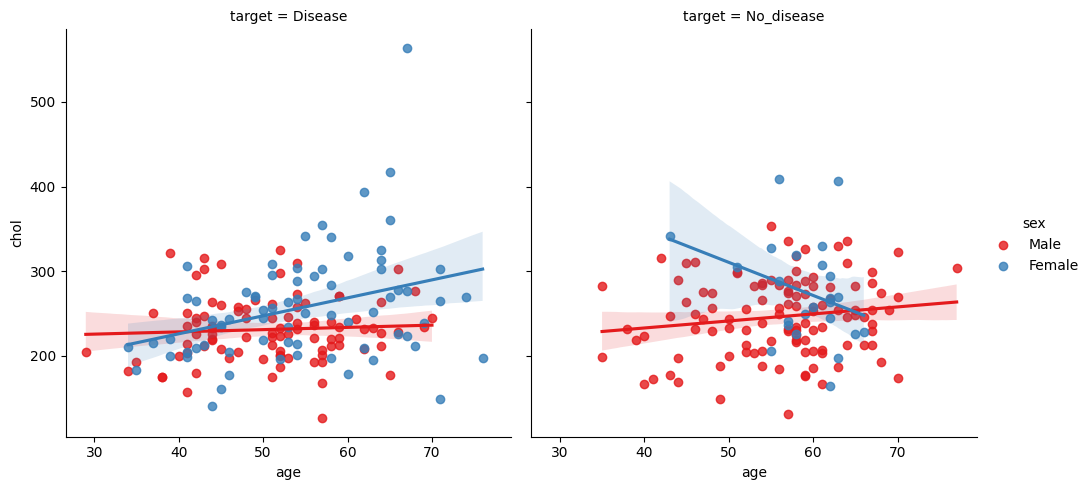

In [17]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

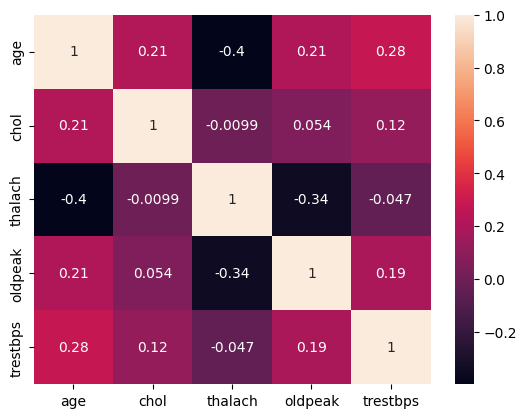

In [18]:
numeric_data = data[continous_features]
# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

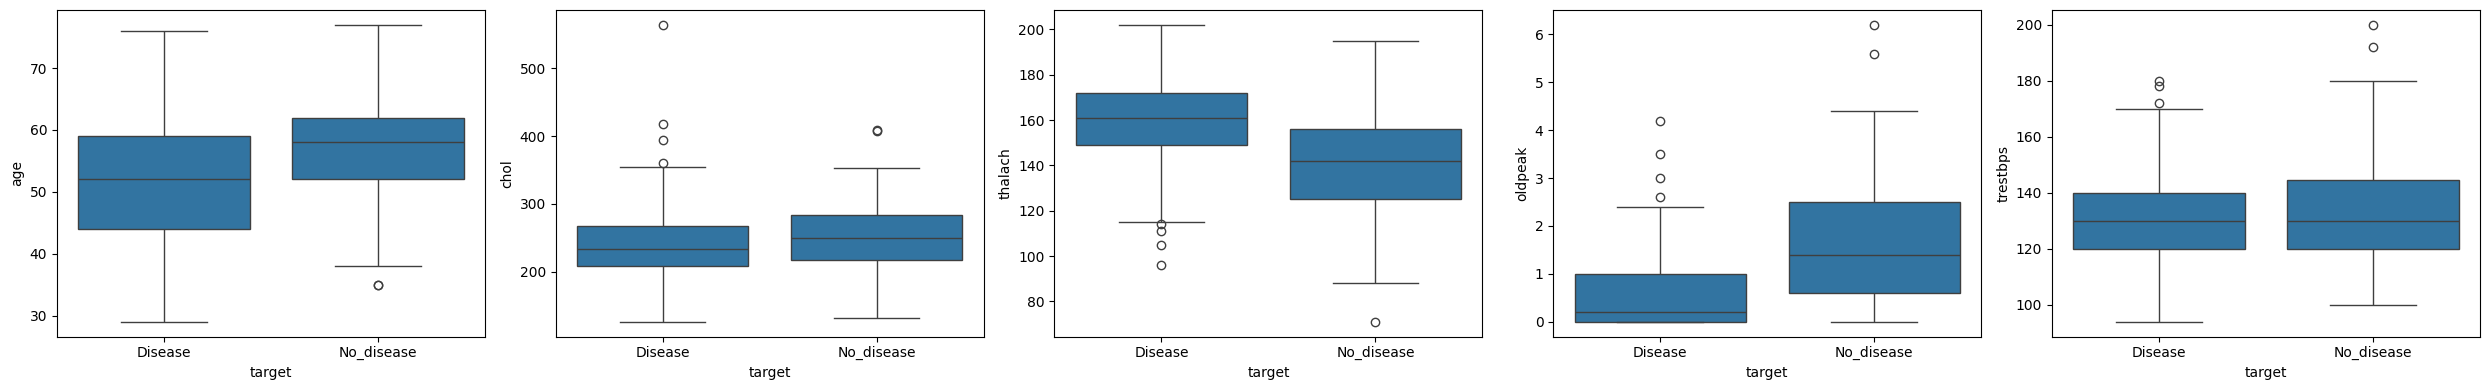

In [19]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

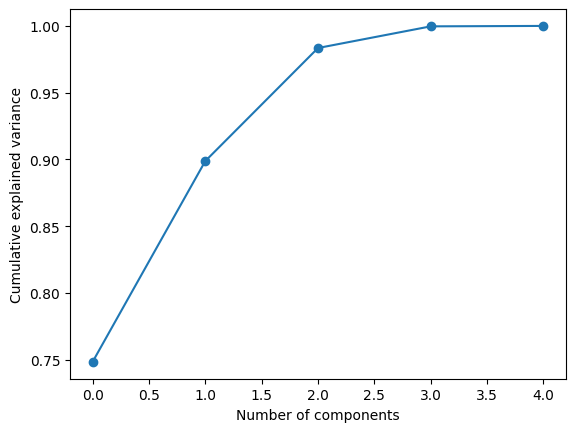

In [20]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

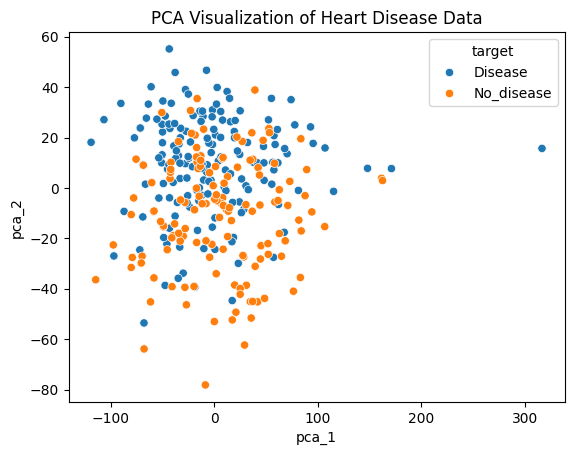

In [21]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


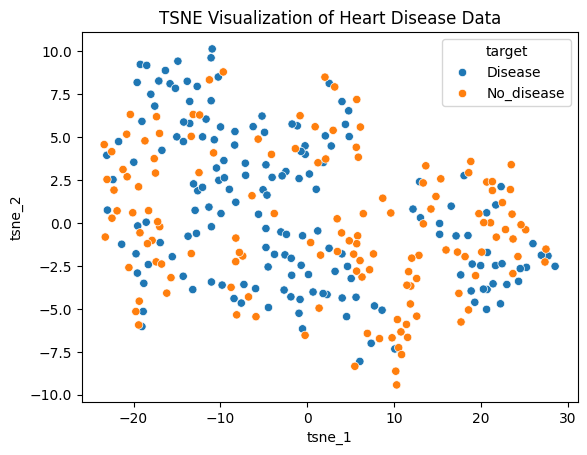

In [22]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [23]:
#A1)
#Gives total no. of samples
total_samples = len(pca_df)
#shows no. of disease and non-disease samples
table = pca_df["target"].value_counts()
#Gives the no. of samples with disease
disease_samples = table.iloc[0]
percentage_disease = (disease_samples / total_samples) *100
print(f"Percentage of samples with heart disease: {percentage_disease:.2f}%")


Percentage of samples with heart disease: 54.46%


**Conclusion:**  Percentage of samples with heart disease: 54.46%


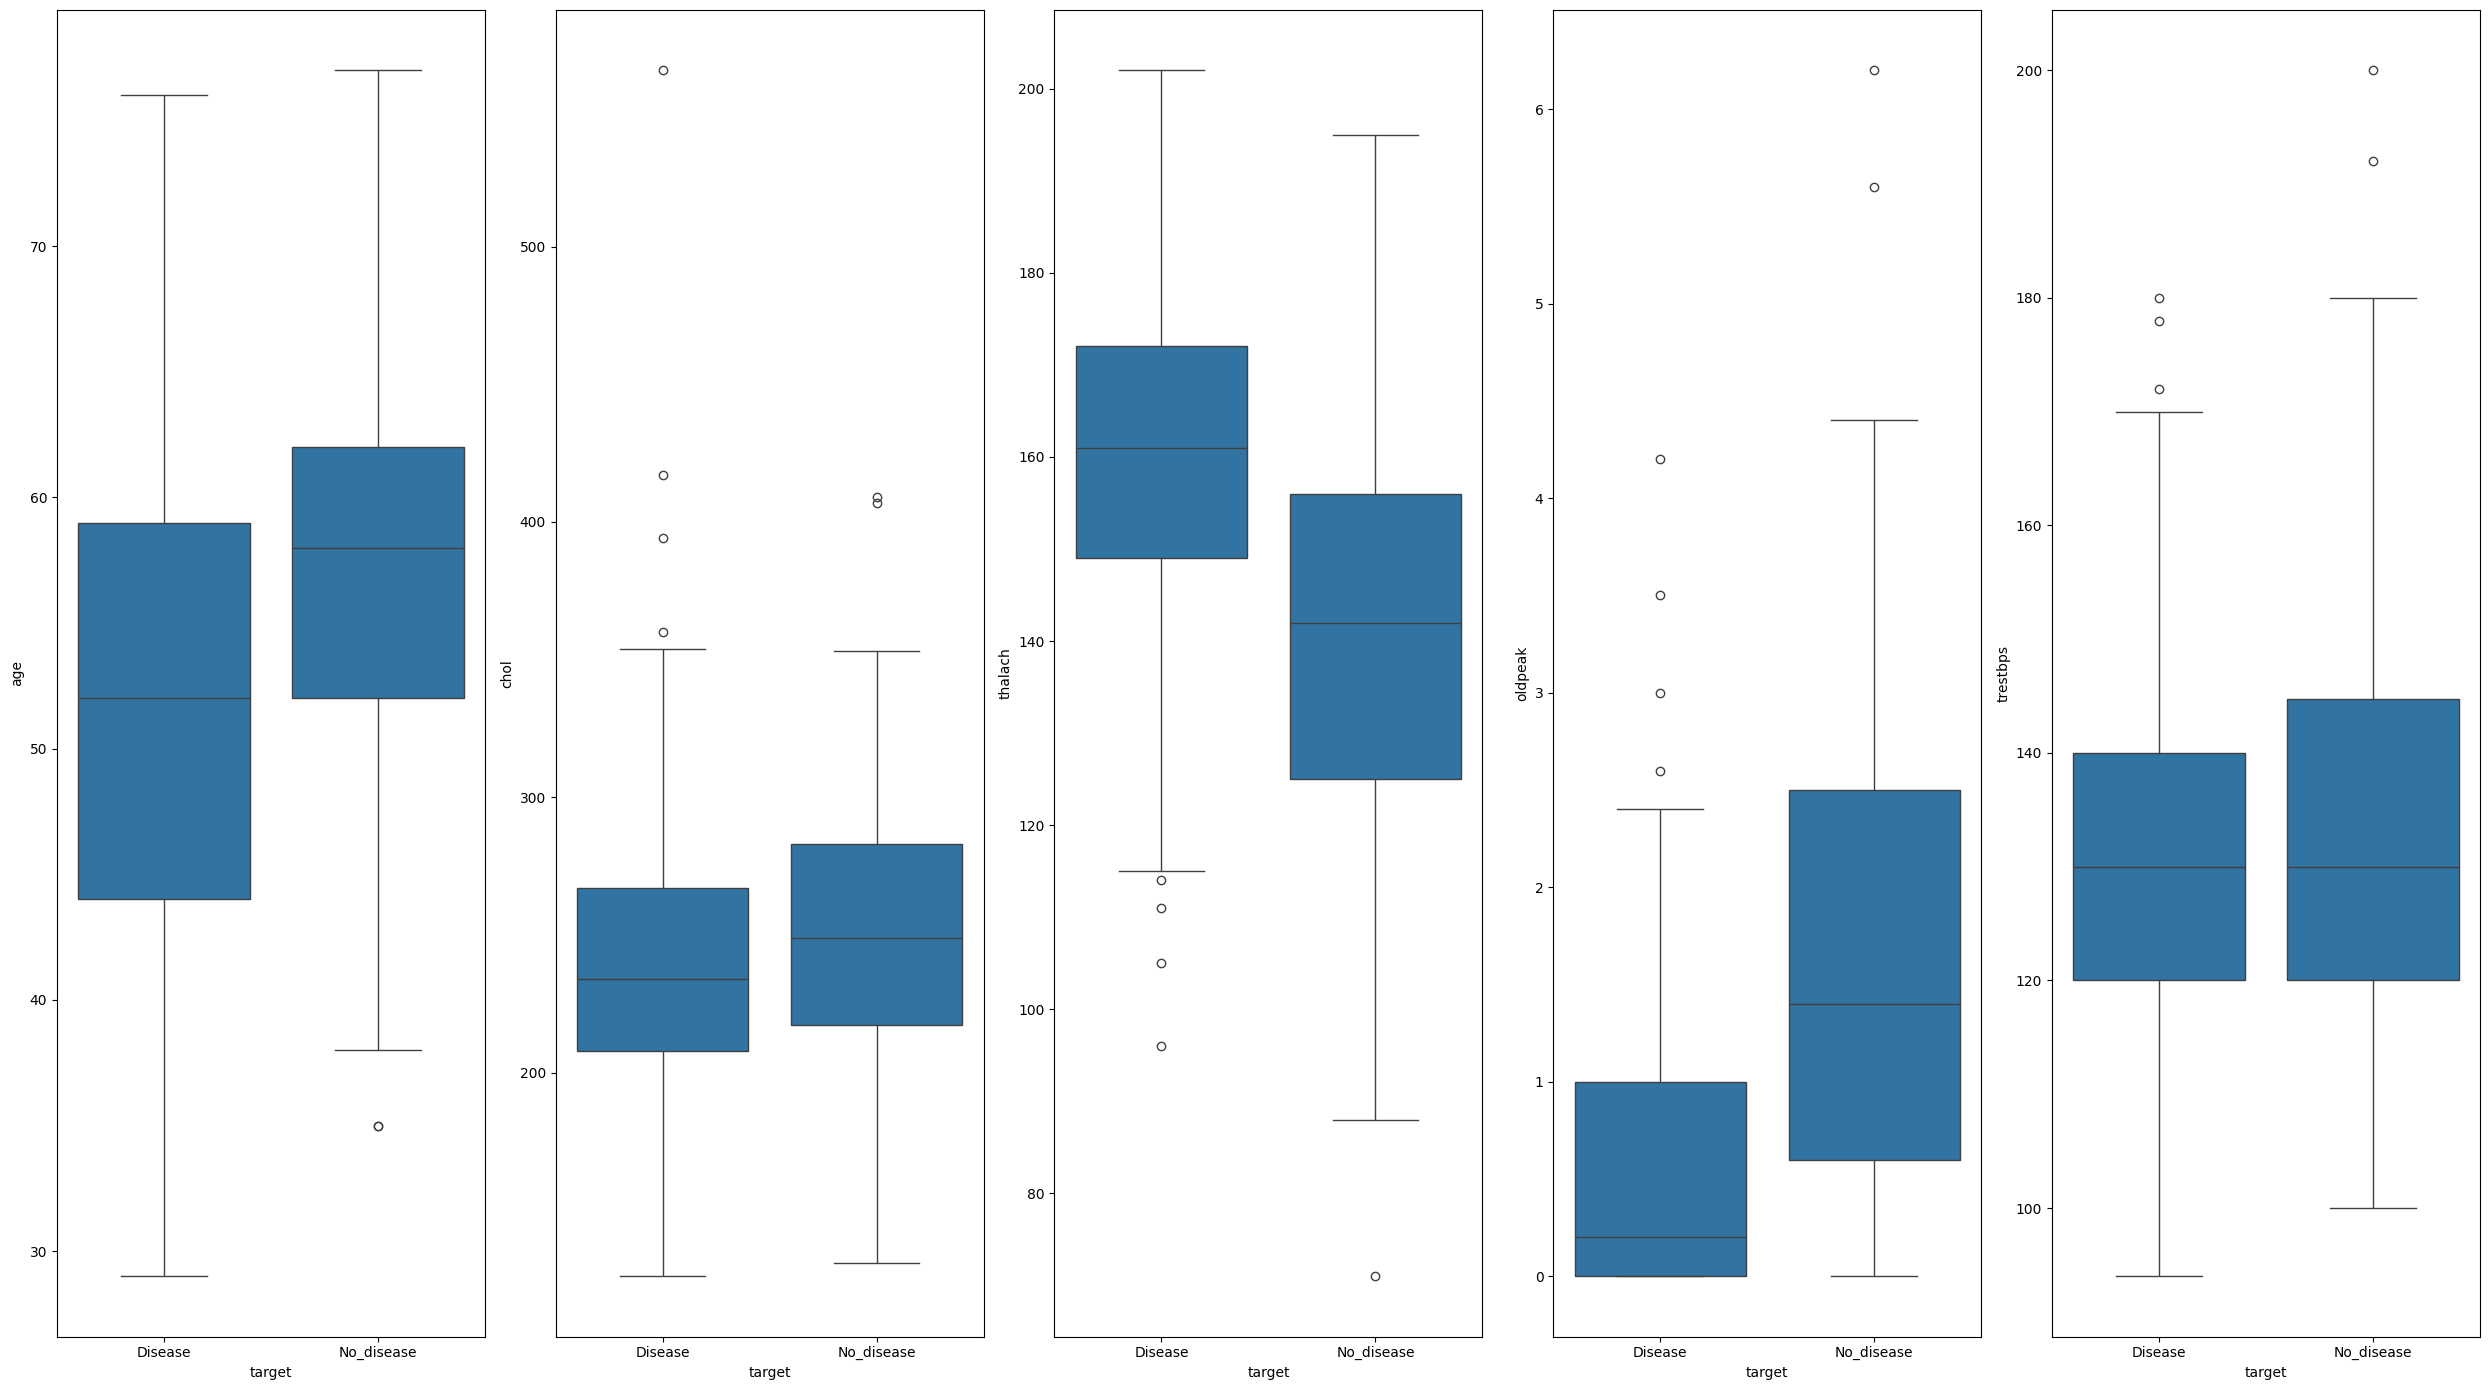

In [24]:
#A2)
# List of continuous features
continuous_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']  # Replace with actual feature names
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 14), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x=data['target'], y=feature, data=data, ax=axes[idx])

plt.tight_layout()
plt.show()


**A2)**
As seen from the above plots the 3 continous features that show a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease are age, thalach,and oldpeak.

**A3)**
As seen from the above tsne and pca plots we can see there are no visible clusters between the samples with diseases and the samples without diseases.
This leads us to conclude that no clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots.

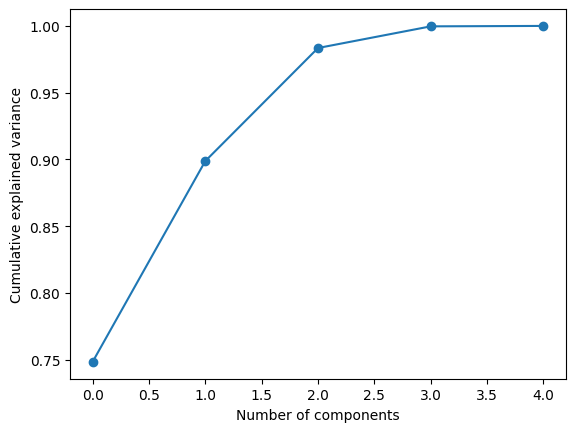

In [25]:
#A4)
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

**Conclusion:**From the above graph we see that the optimal number of principal components is 3.

age       age         1.000000
          chol        0.213678
          thalach    -0.398522
          oldpeak     0.210013
          trestbps    0.279351
chol      age         0.213678
          chol        1.000000
          thalach    -0.009940
          oldpeak     0.053952
          trestbps    0.123174
thalach   age        -0.398522
          chol       -0.009940
          thalach     1.000000
          oldpeak    -0.344187
          trestbps   -0.046698
oldpeak   age         0.210013
          chol        0.053952
          thalach    -0.344187
          oldpeak     1.000000
          trestbps    0.193216
trestbps  age         0.279351
          chol        0.123174
          thalach    -0.046698
          oldpeak     0.193216
          trestbps    1.000000
dtype: float64


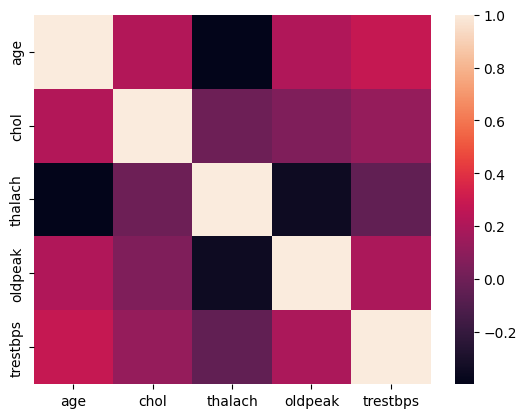

In [26]:
#A5)
corr_matrix = numeric_data.corr()
nc = corr_matrix.unstack()
sorted = nc.sort_values(kind = "mergesort")
sns.heatmap(corr_matrix)
print(nc)

**Conclusion:**From the above data and the heatmap we can confidently conclude that age and trestbps are the continous features with the highest correation with each other.

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [27]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [28]:
data = pd.read_csv("star_nutri_expanded.csv")

In [29]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [30]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [31]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [32]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [34]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [35]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [36]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [37]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [38]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [39]:

data = data.replace({True: 1, False: 0})


<ipython-input-39-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [40]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-40-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [41]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

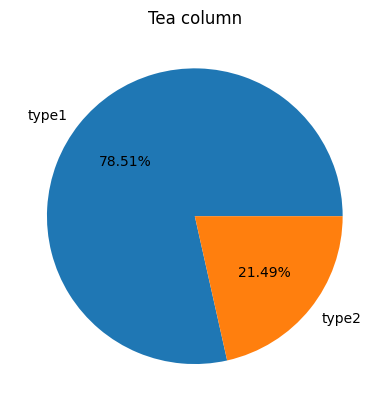

In [43]:
# Create a pie chart of the 'Tea' column also write your observation form the plot
plt.pie(data['Tea'].value_counts(), labels=["type1","type2"], autopct='%1.2f%%')
plt.title('Tea column')
plt.show()

**Observation:-**

From the plot we can see that there are two types of tea and they occupy 78.51% and 21.49% of the total area respectively.

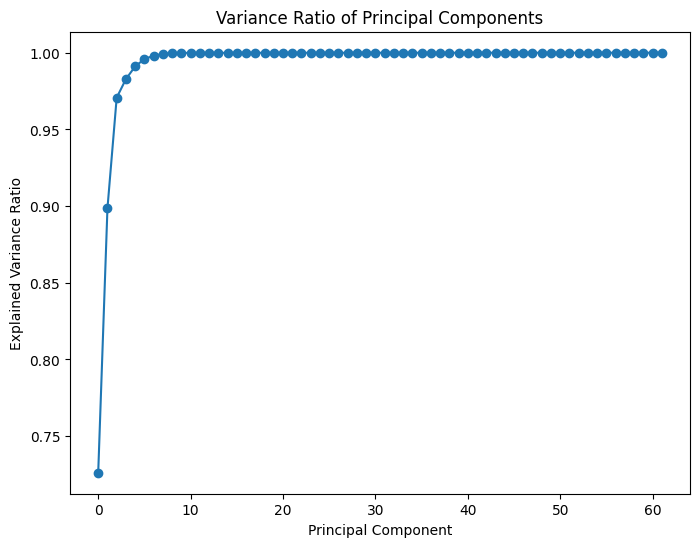

In [44]:
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Drop non-numeric columns (assuming the first column is non-numeric)
data_numeric = data.select_dtypes(include=[np.number])

# Standardize the features
x = StandardScaler().fit_transform(data_numeric)

# Perform PCA
pca = PCA()  # Adjust the number of components as needed
principalComponents = pca.fit(data_numeric)

# Plot the Explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Ratio of Principal Components')
plt.show()

**A)** As we can see from the graph the optimal number if principal components is 3.

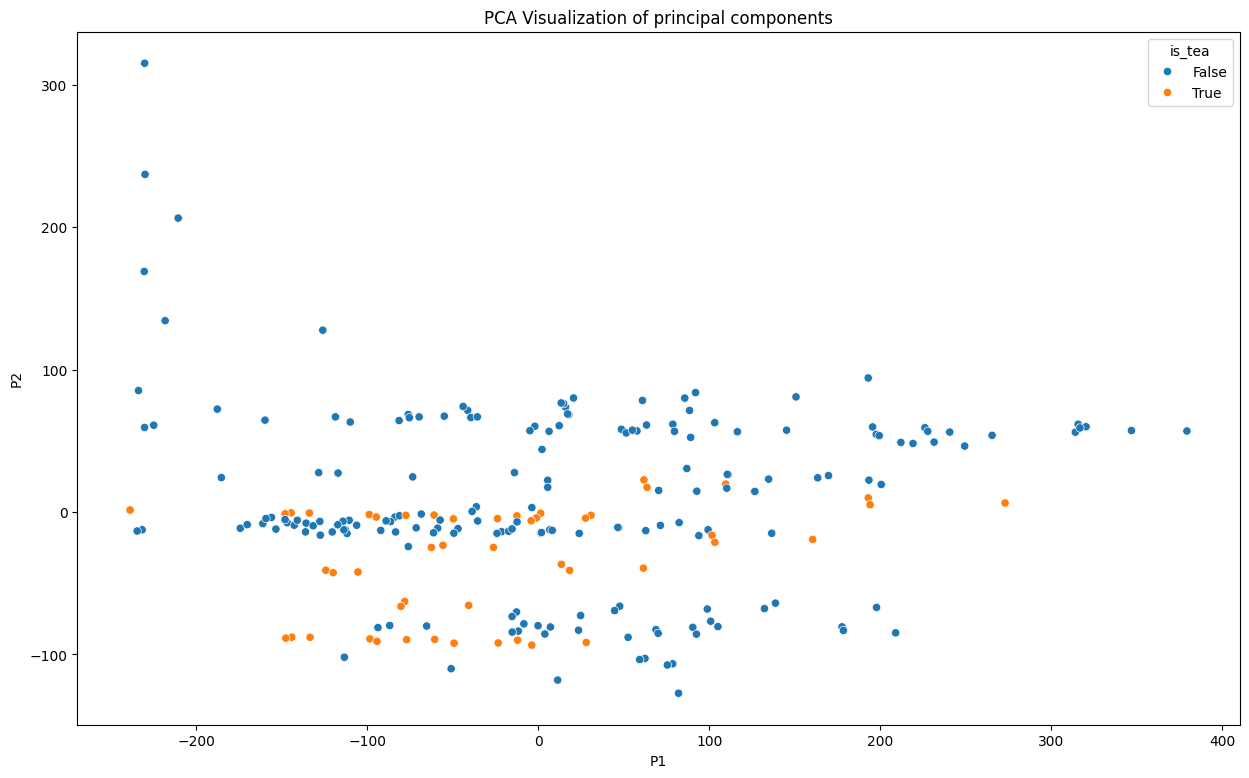

In [45]:
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
data = pd.read_csv("star_nutri_expanded.csv")
#create a dataframe with the principal components
pca = PCA(n_components=3)
principalComponents = pca.fit(data_numeric)
pca.fit(data_numeric)

#Transforming PCA
data_new = pca.transform(data_numeric)

# Ensure the 'Beverage_category' column is of string type
data['Beverage_category'] = data['Beverage_category'].astype(str)
# Add a new column indicating whether a drink is tea or non-tea
data['is_tea'] = data['Beverage_category'].str.contains('Tea', case=False, na=False)

#making a new PC dataframe
pc_df = pd.DataFrame({
    "P1":data_new[:,0],
    "P2":data_new[:,1],
    "is_tea": data["is_tea"]
})

#Plotting scatterplot after setting size
plt.figure(figsize=(15, 9))
sns.scatterplot(x="P1", y="P2", hue="is_tea", data=pc_df)
plt.title("PCA Visualization of principal components")
plt.show()

**Observation:**
From the plot we can see that majority of the drinks are non-Tea drinks.        
The Tea drinks mostly occupy the mid to lower section of the graph and they are mostly in the same values of pca2.                                               
Additionally, we can observe that the samples are spreadout,and clustering is mainly observed at pca2 value of 0 indicating similarity between samples.The orientation and spread of data points can indicate correlations between original features.

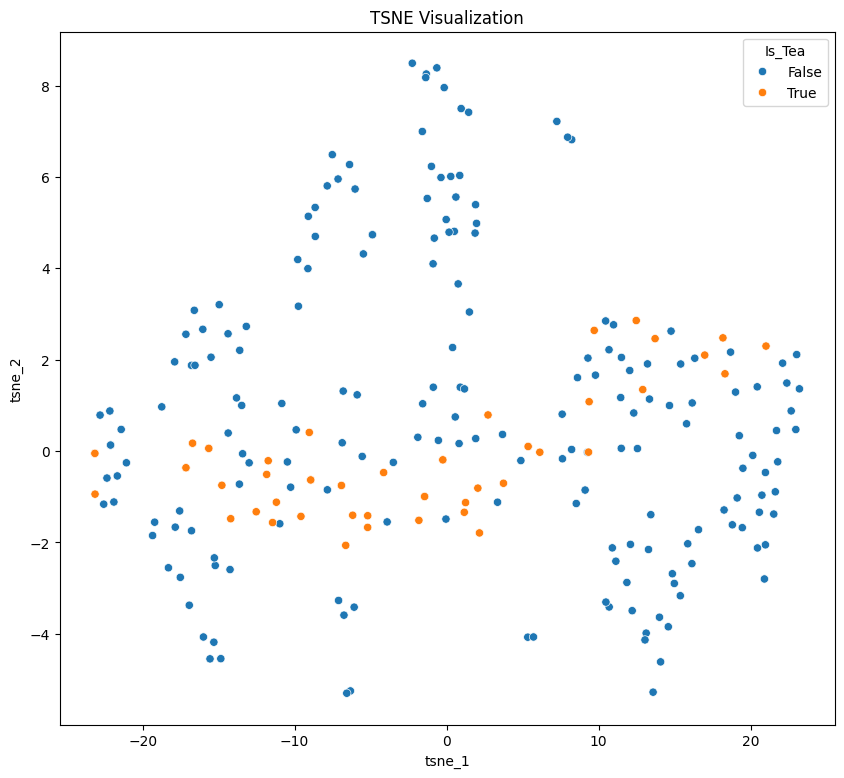

In [46]:
# plot the first 2 components of tsne, whats you observation from the plot?


# Ensure the 'Beverage_category' column is of string type
data['Beverage_category'] = data['Beverage_category'].astype(str)

# Add a new column indicating whether a drink is tea or non-tea
data['Is_Tea'] = data['Beverage_category'].str.contains('Tea', case=False, na=False)

# Select all numeric columns
data_numeric = data.select_dtypes(include=[np.number])

#Fitting tsne model
tsnedata = tsne.fit_transform(data_numeric)

# Creating a DataFrame with the TSNE components and target labels
tsne_d = pd.DataFrame({
    "tsne_1": tsnedata[:, 0],
    "tsne_2": tsnedata[:, 1],
    "Is_Tea": data['Is_Tea']
})

# Visualize the TSNE results with a scatter plot, coloring by 'Is_Tea'
plt.figure(figsize=(10, 9))
sns.scatterplot(x="tsne_1", y="tsne_2", hue="Is_Tea", data=tsne_d)
plt.title("TSNE Visualization")
plt.show()


**Observation:**
From the plot we can tell that the majority of the drinks are Non-Tea drinks. Many of the tea drinks have similar featuresto the non-Tea ones as they are in close proximity to each other. Moreover there is not much clustering, meaning the Beverages cant be specifically grouped into a particular group that easily.

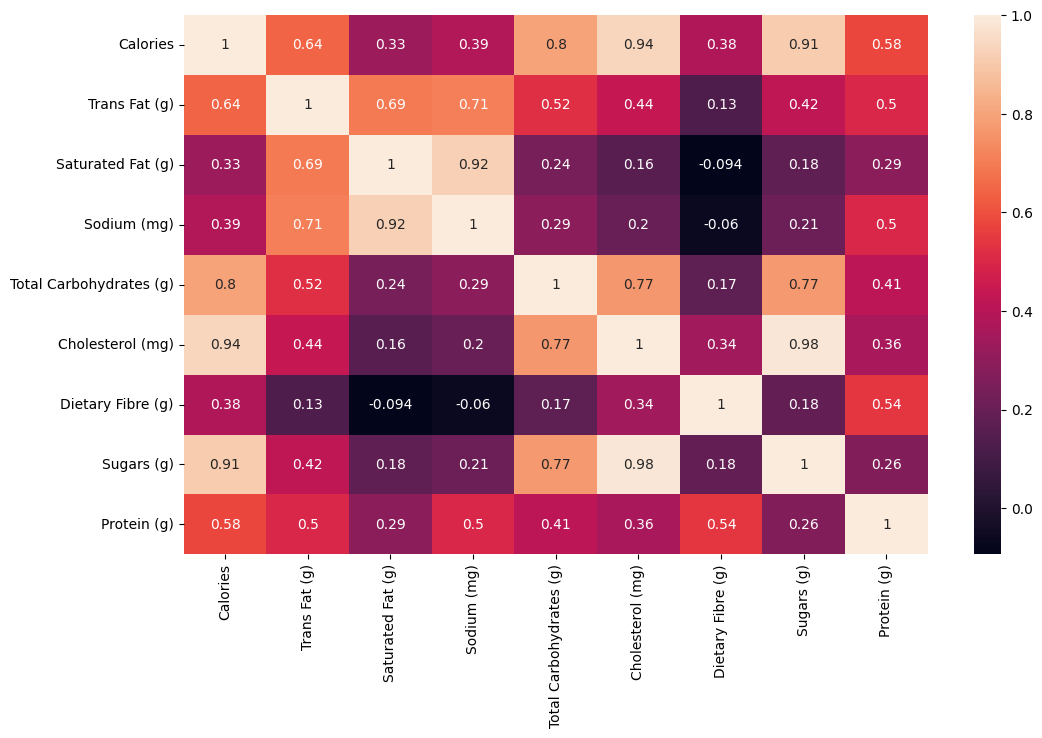

In [47]:
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?

# Compute the correlation matrix
plt.figure(figsize=(12, 7))
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Observation:**
From the above heatmap we can say that there are a wide variety of drinks which contain different proportions of calories,transfat,sodium,carbohydrates,cholestrol,fibre,sugars,and protein.In the beverages the most common combinations include that of sodium and saturated fat,high sugars and cholestrol,high sugars and calories, high calories and high cholesterol;while combinations such as high dietary fibre and saturated fat, sodium and dietary fibre are less prominent and are hence in black.

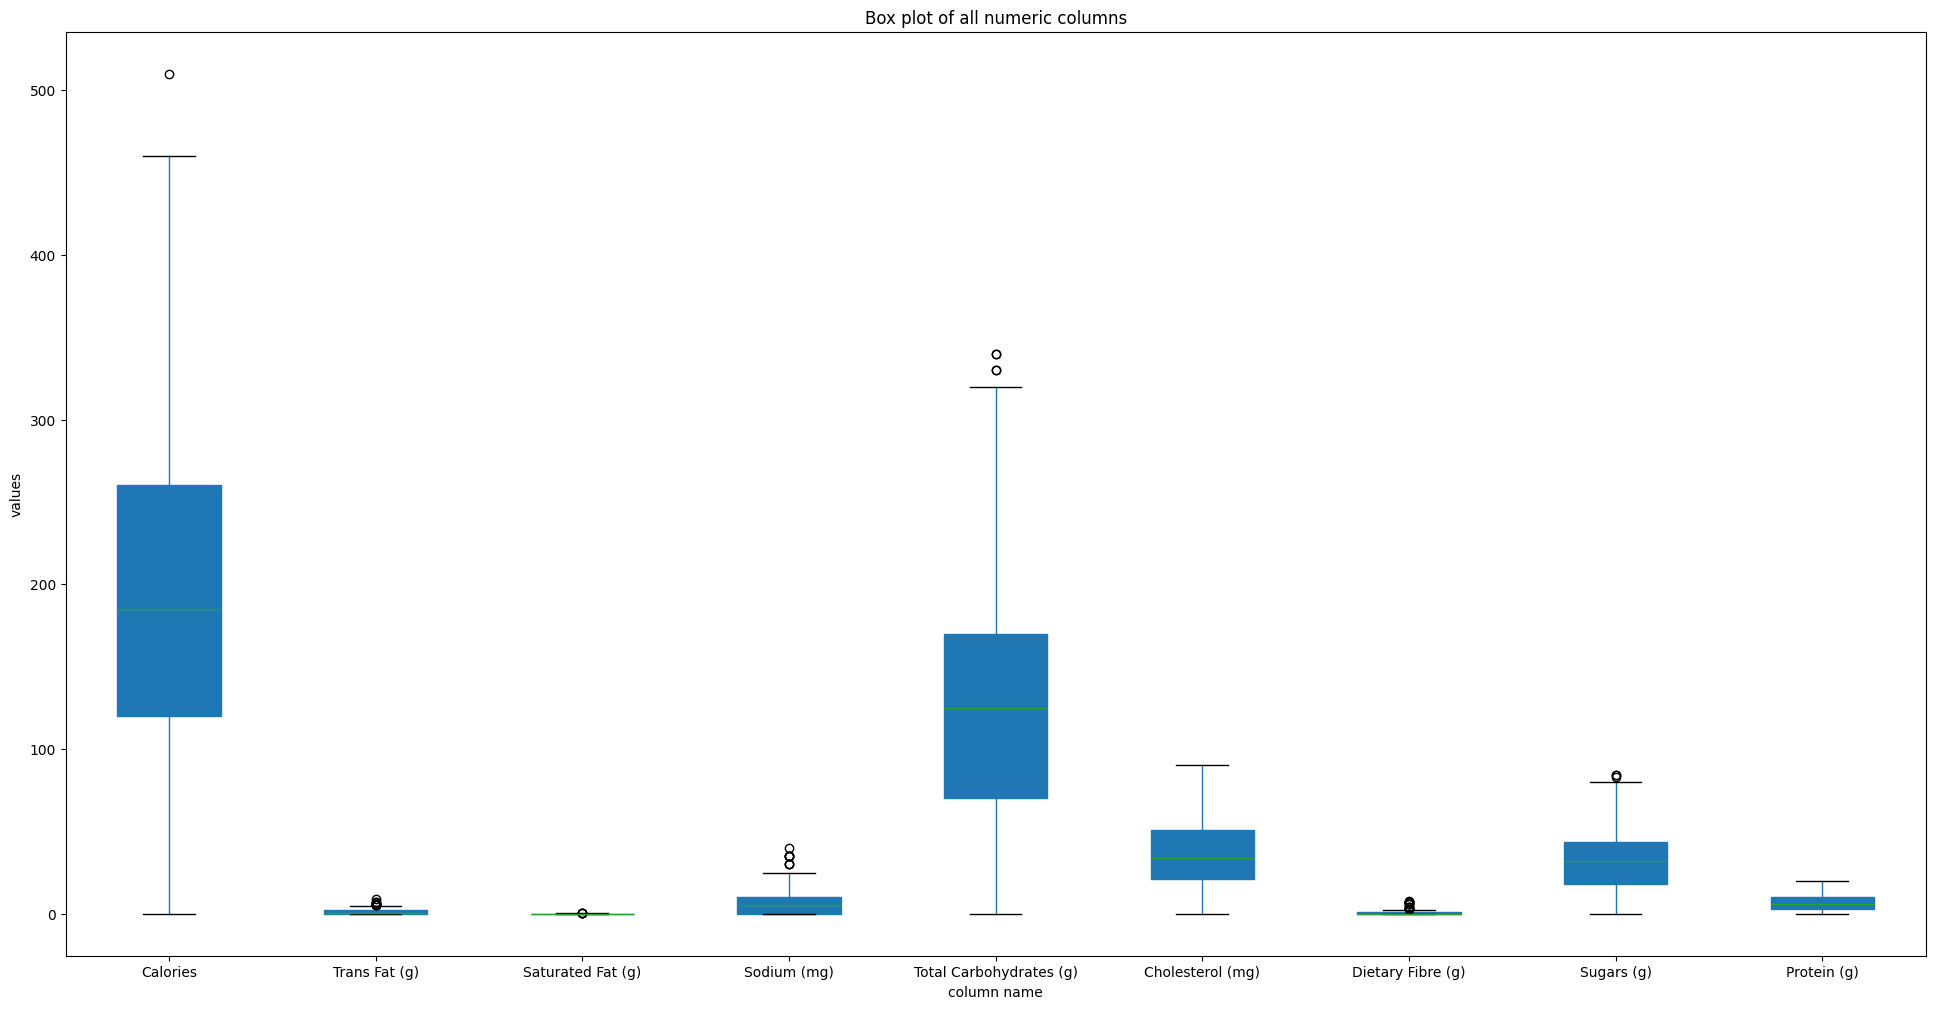

In [48]:
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
data_numeric_new = data.select_dtypes(include=[np.number])
plt.figure(figsize=(24, 12))
boxplot = data_numeric_new.boxplot(patch_artist=True)
plt.title('Box plot of all numeric columns')
plt.xlabel("column name")
plt.ylabel("values")
plt.grid(False)
plt.show()

As we know, generally tea has a high amount of sugar as compared to coffee hence, the "sugar" column can be an indicator to see if it's a Tea or a Non-Tea beverage.

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.